# Анализ датасета Google Play Store Apps

выдвинутые гипотезы:

## Гипотеза 1:
Приложения категории "GAME" имеют более высокие рейтинги, чем приложения других категорий.
•	Логика: Игры часто создаются с упором на развлечение и вовлеченность пользователей, что может повышать их рейтинг.
________________________________________
## Гипотеза 2:
Платные приложения ("Paid") имеют более высокий средний рейтинг, чем бесплатные ("Free").
•	Логика: Пользователи ожидают более качественного контента от платных приложений, что отражается в их оценках.
________________________________________
## Гипотеза 3:
Существует значимая прямая корреляция между размером приложения и его отношению к категории «GAME». Приложения большего размера чаще относятся к категории " GAME ", чем к другим категориям. 
•	Логика: Игры часто содержат графику, аудио и сложные механики, которые увеличивают их размер.
________________________________________
## Гипотеза 4:
Платные приложения чаще встречаются в категориях "Business" и "Education", чем в категориях "Entertainment" и "Games".
•	Логика: Приложения для бизнеса и образования часто предлагают специализированные функции, за которые пользователи готовы платить.
________________________________________
## Гипотеза 5:
Приложения с тегом "Everyone" в графе "Content Rating" имеют больше установок, чем приложения с возрастными ограничениями ("Teen", "Mature 17+").
•	Логика: Приложения без возрастных ограничений доступны для более широкой аудитории, что может увеличивать их популярность.



Прочитаем данные:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from statistics import mean, median


In [3]:
# Считывание данных в DataFrame
data = pd.read_csv('googleplaystore.csv')

# Вывод первых 5 строк для проверки
data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Информация о DataFrame
data.info()

# Проверка на пропущенные значения
data.isnull().sum()

# Общий размер набора данных
print(f'Размер набора данных: {data.shape}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
Размер набора данных: (10841, 13)


In [5]:
# Считаем строки с пустыми значениями
missing_values_count = data.isnull().any(axis=1).sum()

print(f"Количество строк с пустыми значениями: {missing_values_count}")


Количество строк с пустыми значениями: 1481


In [6]:
# Удаление строк с пустыми значениями
data_cleaned = data.dropna()

# Проверка размера очищенного набора данных
print(f"Размер очищенного набора данных: {data_cleaned.shape}")

# Считаем строки с пустыми значениями
missing_values_count = data_cleaned.isnull().any(axis=1).sum()

print(f"Количество строк с пустыми значениями: {missing_values_count}")



Размер очищенного набора данных: (9360, 13)
Количество строк с пустыми значениями: 0


In [7]:
# Исключаем столбец "App" (названия приложений)
columns_to_analyze = data_cleaned.drop(columns=['App'], errors='ignore')

# Вывод всех уникальных значений для каждого столбца
for column in columns_to_analyze.columns:
    unique_values = columns_to_analyze[column].unique()
    print(f"Столбец: {column}")
    print(f"Уникальные значения ({len(unique_values)}): {unique_values}")
    print("-" * 50)



Столбец: Category
Уникальные значения (33): ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
--------------------------------------------------
Столбец: Rating
Уникальные значения (39): [4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 4.  4.8 4.9 3.6 3.7 3.2 3.3 3.4 3.5
 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6 2.1
 1.4 1.5 1.2]
--------------------------------------------------
Столбец: Reviews
Уникальные значения (5990): ['159' '967' '87510' ... '603' '1195' '398307']
--------------------------------------------------
Столбец: Size
Уникальные значения (413): [

In [7]:
# column = 'Content Rating'
# unique_values = sorted(columns_to_analyze[column].unique(), reverse=True)
# print(f"Столбец: {column}")
# print(f"Уникальные значения ({len(unique_values)}): {unique_values}")
# print("-" * 50)


In [8]:
# Удаление строк, где Size == "Varies with device"
columns_to_analyze = columns_to_analyze[columns_to_analyze['Size'] != "Varies with device"]

# Проверка результата
print(f"Количество строк после удаления: {len(columns_to_analyze)}")

column = 'Size'
unique_values = sorted(columns_to_analyze[column].unique(), reverse=True)
print(f"Столбец: {column}")
print(f"Уникальные значения ({len(unique_values)}): {unique_values}")
print("-" * 50)


Количество строк после удаления: 7723
Столбец: Size
Уникальные значения (412): ['99M', '994k', '98M', '986k', '982k', '980k', '97M', '976k', '975k', '96M', '965k', '963k', '95M', '957k', '954k', '953k', '951k', '94M', '948k', '93k', '93M', '939k', '930k', '92M', '924k', '920k', '91k', '91M', '916k', '914k', '90M', '903k', '9.9M', '9.8M', '9.7M', '9.6M', '9.5M', '9.4M', '9.3M', '9.2M', '9.1M', '9.0M', '89k', '89M', '899k', '892k', '88M', '887k', '87M', '879k', '872k', '86M', '865k', '862k', '861k', '860k', '85M', '857k', '853k', '84M', '847k', '842k', '840k', '83M', '837k', '82k', '82M', '81k', '81M', '818k', '816k', '812k', '811k', '80M', '809k', '801k', '8.9M', '8.8M', '8.7M', '8.6M', '8.5k', '8.5M', '8.4M', '8.3M', '8.2M', '8.1M', '8.0M', '79k', '79M', '78k', '78M', '787k', '785k', '784k', '782k', '780k', '77M', '779k', '778k', '775k', '772k', '76M', '75M', '756k', '74k', '74M', '746k', '73k', '73M', '730k', '72k', '72M', '728k', '721k', '720k', '71M', '717k', '716k', '714k', '713k',

Теперь наши данные очищены.

In [9]:
# Проверка дубликатов
duplicate_count = columns_to_analyze.duplicated().sum()
print(f"Количество дубликатов: {duplicate_count}")


Количество дубликатов: 307


In [10]:
columns_to_analyze = columns_to_analyze.drop_duplicates()
print(f"Количество строк после удаления дубликатов: {len(columns_to_analyze)}")


Количество строк после удаления дубликатов: 7416


In [11]:
def convert_size_to_integer(size):
    if isinstance(size, str) and size[-1].isalpha():  # Проверяем, является ли последний символ буквой
        if size[-1] == 'M':
            return float(size[:-1]) * 1024 #переводим в килобайты
        elif size[-1] == 'G':
            return float(size[:-1]) * 1024 * 1024 #переводим в килобайты
        return float(size[:-1])  # Убираем последний символ и преобразуем в float
    elif isinstance(size, str):  # Если последний символ не буква
        return float(size)
    print('kaka')
    return None  # Возвращаем None для некорректных значений

# Создание нового столбца Size_integer
columns_to_analyze['Size_integer'] = columns_to_analyze['Size'].apply(convert_size_to_integer)

# Проверка результатов
# print(columns_to_analyze[['Size', 'Size_integer']].head())
print(columns_to_analyze.head())


         Category  Rating Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1     159   19M      10,000+  Free     0   
1  ART_AND_DESIGN     3.9     967   14M     500,000+  Free     0   
2  ART_AND_DESIGN     4.7   87510  8.7M   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5  215644   25M  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3     967  2.8M     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  January 15, 2018   
2       Everyone               Art & Design    August 1, 2018   
3           Teen               Art & Design      June 8, 2018   
4       Everyone    Art & Design;Creativity     June 20, 2018   

          Current Ver   Android Ver  Size_integer  
0               1.0.0  4.0.3 and up       19456.0  
1               2.0.0  4.0.3 and up       14336.0  
2               1.2.4  4.0.3 and up        8

In [12]:
# Преобразование столбца Installs
def convert_installs_to_integer(installs):
    if isinstance(installs, str) and installs[-1] == '+':  # Проверяем, заканчивается ли на "+"
        return int(installs[:-1].replace(',', ''))  # Убираем плюс и преобразуем в integer
    print('kaka')
    return None  # Для некорректных значений

# Преобразование столбца Price
def convert_price_to_float(price):
    if isinstance(price, str) and price[0] == '$':  # Проверяем, начинается ли с символа $
        return float(price[1:].replace(',', ''))  # Убираем символ доллара и преобразуем в float
    return float(price)

# Добавление новых столбцов
columns_to_analyze['Installs_more'] = columns_to_analyze['Installs'].apply(convert_installs_to_integer)
columns_to_analyze['Price_without_dollar'] = columns_to_analyze['Price'].apply(convert_price_to_float)

# Проверка результатов
print(columns_to_analyze[['Installs', 'Installs_more', 'Price', 'Price_without_dollar']].head())
print(columns_to_analyze.head())


      Installs  Installs_more Price  Price_without_dollar
0      10,000+          10000     0                   0.0
1     500,000+         500000     0                   0.0
2   5,000,000+        5000000     0                   0.0
3  50,000,000+       50000000     0                   0.0
4     100,000+         100000     0                   0.0
         Category  Rating Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1     159   19M      10,000+  Free     0   
1  ART_AND_DESIGN     3.9     967   14M     500,000+  Free     0   
2  ART_AND_DESIGN     4.7   87510  8.7M   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5  215644   25M  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3     967  2.8M     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  January 15, 2018   
2       Everyone               Art & Design    A

In [13]:
# Проверка результатов
print(columns_to_analyze.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7416 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              7416 non-null   object 
 1   Rating                7416 non-null   float64
 2   Reviews               7416 non-null   object 
 3   Size                  7416 non-null   object 
 4   Installs              7416 non-null   object 
 5   Type                  7416 non-null   object 
 6   Price                 7416 non-null   object 
 7   Content Rating        7416 non-null   object 
 8   Genres                7416 non-null   object 
 9   Last Updated          7416 non-null   object 
 10  Current Ver           7416 non-null   object 
 11  Android Ver           7416 non-null   object 
 12  Size_integer          7416 non-null   float64
 13  Installs_more         7416 non-null   int64  
 14  Price_without_dollar  7416 non-null   float64
dtypes: float64(3), int64(1), 

Теперь данные подготовлены.

Проверка первой гипотезы

In [14]:
# Фильтрация данных для категорий 'GAME' и других категорий
game_apps = columns_to_analyze[columns_to_analyze['Category'] == 'GAME']
other_apps = columns_to_analyze[columns_to_analyze['Category'] != 'GAME']

# Средний рейтинг для категории 'GAME' и других категорий
average_game_rating = game_apps['Rating'].mean()
average_other_rating = other_apps['Rating'].mean()

print(f"Средний рейтинг для категории 'GAME': {average_game_rating}")
print(f"Средний рейтинг для других категорий: {average_other_rating}")


Средний рейтинг для категории 'GAME': 4.265693430656935
Средний рейтинг для других категорий: 4.157395075112281


Для более детального анализа можно посчитать статистики по рейтингу (например, медиану, стандартное отклонение) и посмотреть на распределение рейтингов для обеих категорий.

In [16]:
# Описательная статистика для категории 'GAME' и других категорий
game_stats = game_apps['Rating'].describe()
other_stats = other_apps['Rating'].describe()

print("Описательная статистика для категории 'GAME':")
print(game_stats)
print("\nОписательная статистика для других категорий:")
print(other_stats)


Описательная статистика для категории 'GAME':
count    959.000000
mean       4.265693
std        0.378467
min        1.000000
25%        4.100000
50%        4.300000
75%        4.500000
max        5.000000
Name: Rating, dtype: float64

Описательная статистика для других категорий:
count    6457.000000
mean        4.157395
std         0.569632
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64


Используем описательную статистику для оценки среднего рейтинга, стандартного отклонения и других метрик, которые могут помочь понять, насколько различаются рейтинги в этих двух группах.

In [62]:
# # Вычисление медианы и стандартного отклонения для обеих категорий
# game_median = game_apps['Rating'].median()
# other_median = other_apps['Rating'].median()

# game_std = game_apps['Rating'].std()
# other_std = other_apps['Rating'].std()

# print(f"Медиана рейтинга для 'GAME': {game_median}")
# print(f"Медиана рейтинга для других категорий: {other_median}")
# print(f"Стандартное отклонение для 'GAME': {game_std}")
# print(f"Стандартное отклонение для других категорий: {other_std}")


Для лучшего понимания распределения рейтингов в обеих группах можно построить графики — например, боксплоты или гистограммы.

C:\Users\Иван\AppData\Local\Temp\ipykernel_24444\8986040.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Rating', data=columns_to_analyze[columns_to_analyze['Category'].isin(['GAME', 'Other'])],


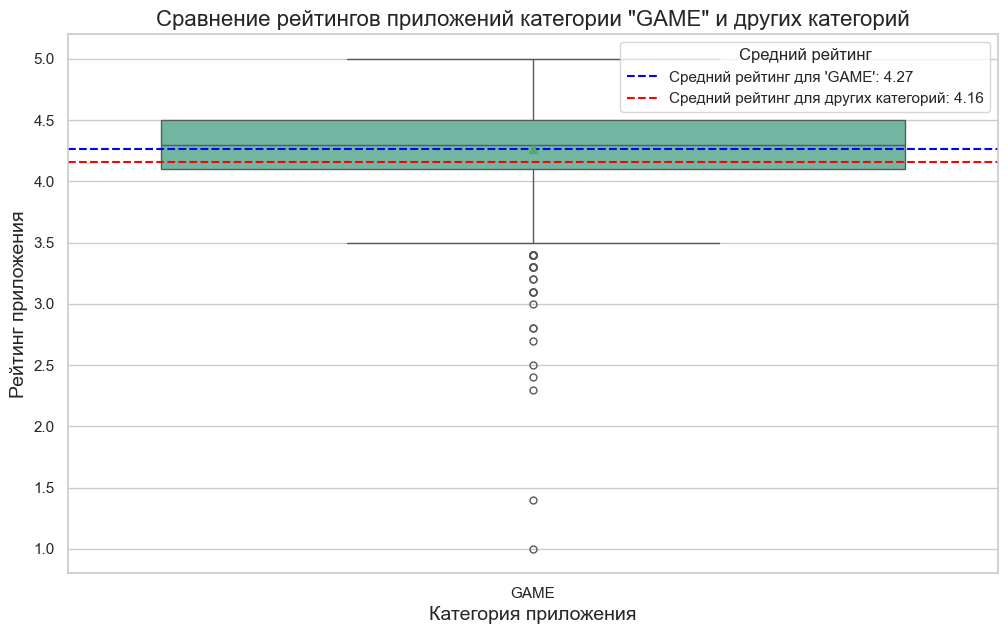

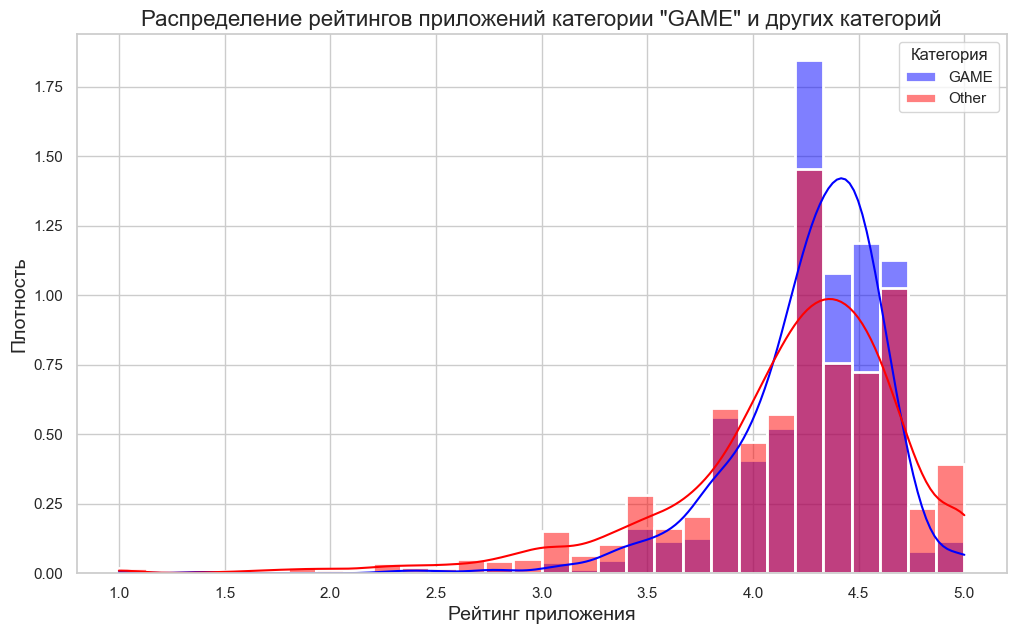

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Параметры оформления графиков
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 7)

# График боксплота для сравнения рейтингов в категориях 'GAME' и других
plt.figure(figsize=(12, 7))
sns.boxplot(x='Category', y='Rating', data=columns_to_analyze[columns_to_analyze['Category'].isin(['GAME', 'Other'])], 
            palette="Set2", showmeans=True, fliersize=5)

# Добавление средней линии
game_mean = game_apps['Rating'].mean()
other_mean = other_apps['Rating'].mean()
plt.axhline(game_mean, color='blue', linestyle='--', label=f"Средний рейтинг для 'GAME': {game_mean:.2f}")
plt.axhline(other_mean, color='red', linestyle='--', label=f"Средний рейтинг для других категорий: {other_mean:.2f}")

# Добавление подписей, заголовков и легенды
plt.title('Сравнение рейтингов приложений категории "GAME" и других категорий', fontsize=16)
plt.xlabel('Категория приложения', fontsize=14)
plt.ylabel('Рейтинг приложения', fontsize=14)
plt.legend(title="Средний рейтинг", loc='upper right')

# Показать график
plt.show()

# Гистограмма с KDE для "GAME" и других категорий
plt.figure(figsize=(12, 7))
sns.histplot(game_apps['Rating'], kde=True, color='blue', label='GAME', bins=30, stat='density', linewidth=2)
sns.histplot(other_apps['Rating'], kde=True, color='red', label='Other', bins=30, stat='density', linewidth=2)

# Подписи и легенда
plt.title('Распределение рейтингов приложений категории "GAME" и других категорий', fontsize=16)
plt.xlabel('Рейтинг приложения', fontsize=14)
plt.ylabel('Плотность', fontsize=14)
plt.legend(title="Категория", loc='upper right')

# Показать график
plt.show()


На основе полученных данных и визуализаций можно сделать выводы о том, есть ли статистически значимая разница в рейтингах между приложениями категории "GAME" и приложениями других категорий.

- Средние значения рейтингов: Если средний рейтинг для приложений категории "GAME" значительно выше, чем для других категорий, это может подтвердить гипотезу.
- Распределение данных: Если графики показывают, что рейтинги приложений категории "GAME" в основном выше, это также может служить подтверждением гипотезы.
- Статистическая значимость: Можно провести тесты на значимость, например, с помощью t-теста для независимых выборок, чтобы подтвердить или опровергнуть различие в средних значениях.

## T-статистика (t-statistic):
Это мера, которая позволяет оценить, насколько различаются средние значения между двумя группами относительно вариации внутри этих групп.

## P-значение (P-value):
Это вероятность того, что наблюдаемая разница между группами возникла случайно.

In [18]:
from scipy import stats

# t-тест для двух независимых выборок
t_stat, p_value = stats.ttest_ind(game_apps['Rating'].dropna(), other_apps['Rating'].dropna())

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 5.703402425668709
P-value: 1.2195586359547648e-08


 t-статистика = 5.703402425668709, что является довольно высоким значением, и это говорит о том, что разница между средними значениями рейтингов для "GAME" и других категорий значительна, что подкрепляет гипотезу о том, что приложения категории "GAME" имеют более высокие рейтинги.

  p-значение = 1.2195586359547648e-08, что эквивалентно 0.000000012. Это очень маленькое значение, значительно меньше стандартного порога значимости 0.05, что позволяет отклонить нулевую гипотезу.

Нулевая гипотеза в данном контексте утверждает, что нет различий между средними значениями рейтингов для приложений категории "GAME" и других категорий.

## Интерпретация:
- Низкое p-значение (значение намного меньше 0.05) указывает на то, что разница между средними рейтингами приложений категории "GAME" и других категорий является статистически значимой.
- t-статистика также подтверждает, что разница между средними значениями достаточно велика, чтобы отклонить нулевую гипотезу.

## Вывод:
На основе результатов t-теста можно сделать вывод, что гипотеза "Приложения категории 'GAME' имеют более высокие рейтинги, чем приложения других категорий" статистически подтверждается. Разница между рейтингами для игр и других категорий является значимой и не является случайной.

Переходим ко второй гипотизе

In [19]:
# Фильтрация данных
paid_apps = columns_to_analyze[columns_to_analyze['Type'] == 'Paid']
free_apps = columns_to_analyze[columns_to_analyze['Type'] == 'Free']

# Проверка количества приложений в каждой категории
print(f"Количество платных приложений: {len(paid_apps)}")
print(f"Количество бесплатных приложений: {len(free_apps)}")


Количество платных приложений: 545
Количество бесплатных приложений: 6871


In [20]:
# Расчет описательных статистик для платных приложений
paid_mean = paid_apps['Rating'].mean()
paid_median = paid_apps['Rating'].median()
paid_std = paid_apps['Rating'].std()

# Расчет описательных статистик для бесплатных приложений
free_mean = free_apps['Rating'].mean()
free_median = free_apps['Rating'].median()
free_std = free_apps['Rating'].std()

# Вывод статистик
print(f"Платные приложения: Средний рейтинг = {paid_mean:.2f}, Медиана = {paid_median:.2f}, Стандартное отклонение = {paid_std:.2f}")
print(f"Бесплатные приложения: Средний рейтинг = {free_mean:.2f}, Медиана = {free_median:.2f}, Стандартное отклонение = {free_std:.2f}")


Платные приложения: Средний рейтинг = 4.25, Медиана = 4.40, Стандартное отклонение = 0.57
Бесплатные приложения: Средний рейтинг = 4.17, Медиана = 4.30, Стандартное отклонение = 0.55


t-тест, чтобы проверить, есть ли статистически значимая разница между средними значениями рейтингов для платных и бесплатных приложений.

In [21]:
from scipy.stats import ttest_ind

# T-тест для сравнения средних значений
t_stat, p_value = ttest_ind(paid_apps['Rating'].dropna(), free_apps['Rating'].dropna(), equal_var=False)

# Вывод результатов
print(f"T-статистика = {t_stat:.2f}, p-значение = {p_value:.5f}")
if p_value < 0.05:
    print("Разница между средними рейтингами платных и бесплатных приложений статистически значима.")
else:
    print("Нет статистически значимой разницы между средними рейтингами платных и бесплатных приложений.")



T-статистика = 3.27, p-значение = 0.00115
Разница между средними рейтингами платных и бесплатных приложений статистически значима.


C:\Users\Иван\AppData\Local\Temp\ipykernel_24444\1350126062.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Type', y='Rating', data=columns_to_analyze, palette='deep', jitter=True, alpha=0.7)


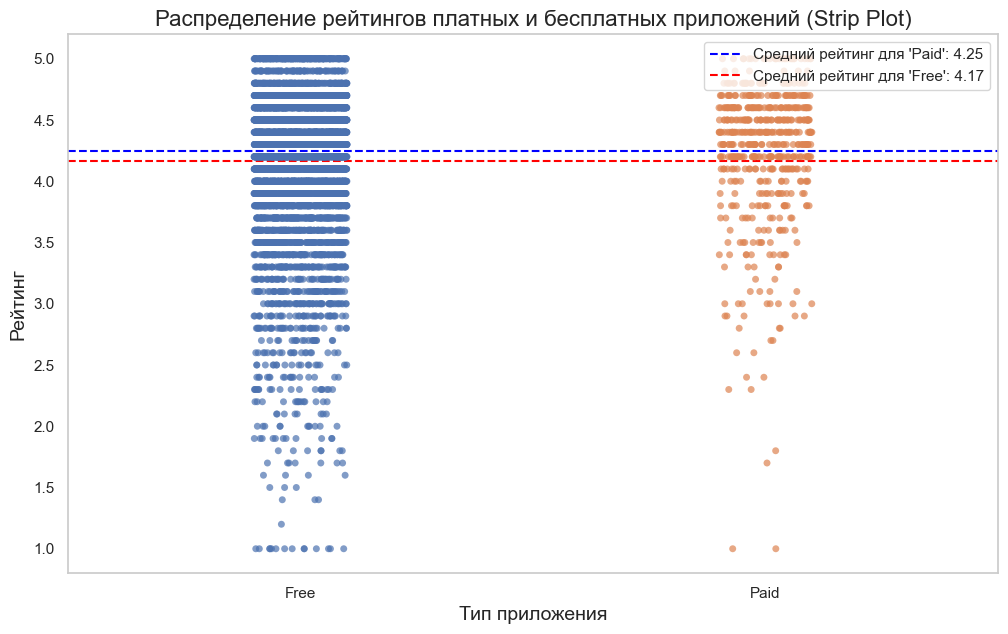

In [22]:
plt.figure(figsize=(12, 7))
sns.stripplot(x='Type', y='Rating', data=columns_to_analyze, palette='deep', jitter=True, alpha=0.7)

# Добавление линий для средних значений
plt.axhline(paid_mean, color='blue', linestyle='--', label=f"Средний рейтинг для 'Paid': {paid_mean:.2f}")
plt.axhline(free_mean, color='red', linestyle='--', label=f"Средний рейтинг для 'Free': {free_mean:.2f}")

# Оформление графика
plt.title("Распределение рейтингов платных и бесплатных приложений (Strip Plot)", fontsize=16)
plt.xlabel("Тип приложения", fontsize=14)
plt.ylabel("Рейтинг", fontsize=14)
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.show()


# Гипотеза подтверждена

Теперь исследуем третью гипотезу

In [23]:
# Отделяем данные для анализа
game_apps = columns_to_analyze[columns_to_analyze['Category'] == 'GAME']
non_game_apps = columns_to_analyze[columns_to_analyze['Category'] != 'GAME']

# Проверка количества игр
print(f"Количество игр: {len(game_apps)}")
print(f"Количество неигр: {len(non_game_apps)}")

print(game_apps.columns)



Количество игр: 959
Количество неигр: 6457
Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Size_integer', 'Installs_more', 'Price_without_dollar'],
      dtype='object')


In [24]:
# Описательные статистики для "GAME" и остальных
game_size_stats = game_apps['Size_integer'].describe()
non_game_size_stats = non_game_apps['Size_integer'].describe()

print("Размер приложений категории 'GAME':\n", game_size_stats)
print("\nРазмер приложений остальных категорий:\n", non_game_size_stats)


Размер приложений категории 'GAME':
 count       959.000000
mean      46184.552659
std       28373.316947
min         116.000000
25%       23552.000000
50%       43008.000000
75%       66048.000000
max      102400.000000
Name: Size_integer, dtype: float64

Размер приложений остальных категорий:
 count      6457.000000
mean      19911.722239
std       21285.060651
min           8.500000
25%        4608.000000
50%       12288.000000
75%       27648.000000
max      102400.000000
Name: Size_integer, dtype: float64


Создадим бинарную переменную Is_Game, где 1 указывает на категорию "GAME", а 0 — на другие.
Рассчитаем коэффициент корреляции между Size_integer и Is_Game.

In [25]:
# Добавление бинарной переменной Is_Game
columns_to_analyze['Is_Game'] = (columns_to_analyze['Category'] == 'GAME').astype(int)

# Расчет корреляции
correlation = columns_to_analyze[['Size_integer', 'Is_Game']].corr()
print("Коэффициент корреляции между размером приложения и принадлежностью к категории 'GAME':\n", correlation)


Коэффициент корреляции между размером приложения и принадлежностью к категории 'GAME':
               Size_integer   Is_Game
Size_integer      1.000000  0.367287
Is_Game           0.367287  1.000000


C:\Users\Иван\AppData\Local\Temp\ipykernel_24444\435321392.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y='Size_integer', data=columns_to_analyze, palette="Set2")


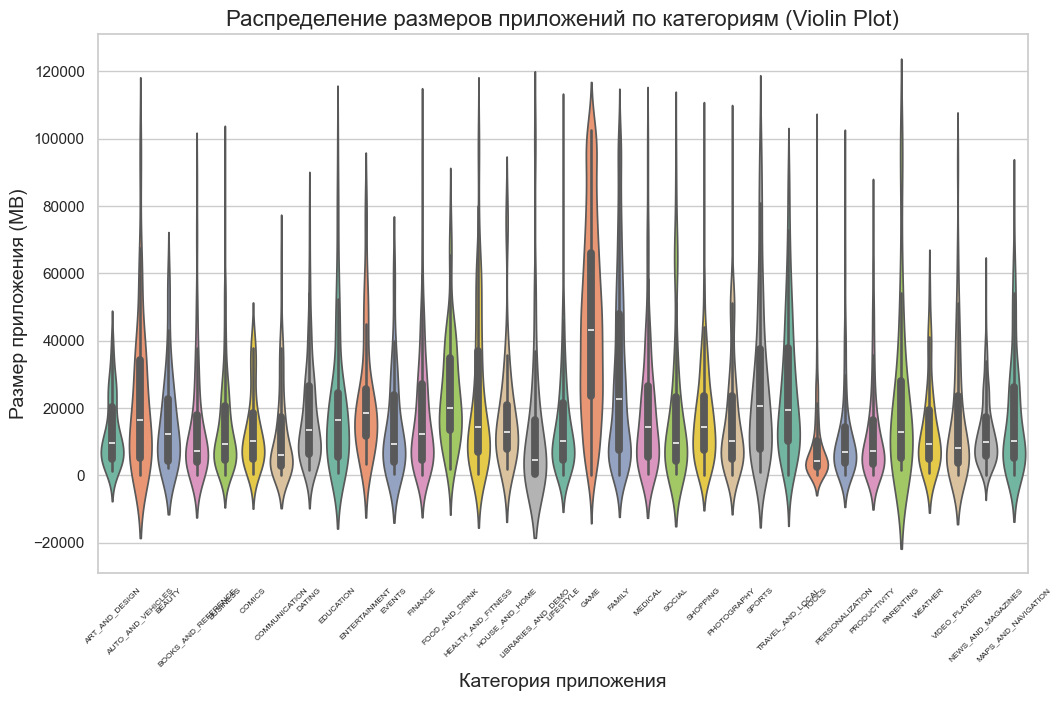

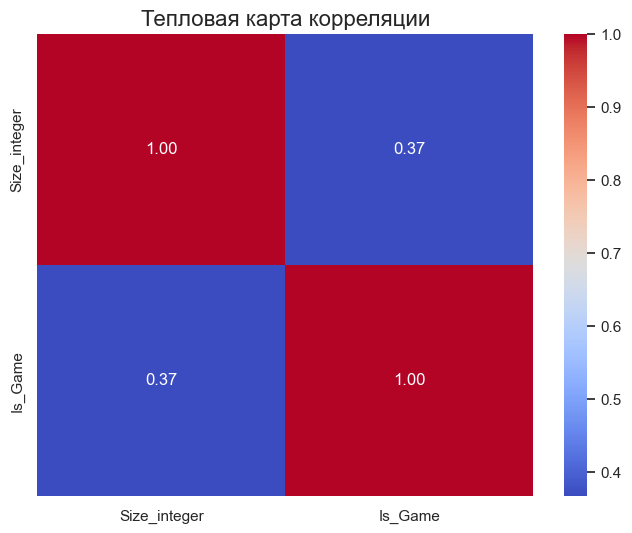

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot для размера приложений по категориям
plt.figure(figsize=(12, 7))
sns.violinplot(x='Category', y='Size_integer', data=columns_to_analyze, palette="Set2")
plt.title('Распределение размеров приложений по категориям (Violin Plot)', fontsize=16)
plt.xlabel('Категория приложения', fontsize=14)
plt.ylabel('Размер приложения (MB)', fontsize=14)
plt.xticks(rotation=45, fontsize=6)
plt.show()

# Тепловая карта корреляции
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title('Тепловая карта корреляции', fontsize=16)
plt.show()


# Вывод:
Анализ данных подтверждает, что существует положительная корреляция между размером приложения и принадлежностью к категории "GAME".

Гипотеза подтверждена

4
 ГИПОТЕЗА:


In [27]:
# Выбор данных для анализа
categories_of_interest = ["BUSINESS", "EDUCATION", "ENTERTAINMENT", "GAME"]
paid_apps = columns_to_analyze[(columns_to_analyze['Type'] == 'Paid') & 
                                (columns_to_analyze['Category'].isin(categories_of_interest))]
# paid_apps.head()


In [28]:
# Агрегирование данных
category_counts = paid_apps['Category'].value_counts()
total_counts = columns_to_analyze[columns_to_analyze['Category'].isin(categories_of_interest)]['Category'].value_counts()
paid_ratios = (category_counts / total_counts).fillna(0)

# Формируем результирующую таблицу
category_analysis = pd.DataFrame({
    "Total Apps": total_counts,
    "Paid Apps": category_counts,
    "Paid Ratio": paid_ratios
}).sort_values(by="Paid Ratio", ascending=False)

category_analysis


,Total Apps,Paid Apps,Paid Ratio
Category,,,
GAME,959,75,0.078206
EDUCATION,95,4,0.042105
BUSINESS,225,8,0.035556
ENTERTAINMENT,67,1,0.014925


По результатам таблицы уже видно, что наша гипотеза неверна. Процент платных игр сам по себе уже превышает процент платных образовательных и бизнес-приложений.

Проверим, существует ли значимая корреляция между наличием платных приложений и принадлежностью к категориям "Business"/"Education".
Используем метод point biserial correlation для корреляции между бинарным и категориальным признаками.

In [29]:
from scipy.stats import pointbiserialr

# Добавляем бинарную переменную для категорий Business/Education
columns_to_analyze['Is_Business_Education'] = columns_to_analyze['Category'].apply(
    lambda x: 1 if x in ["BUSINESS", "EDUCATION"] else 0
)

# Рассчёт корреляции
correlation, p_value = pointbiserialr(
    columns_to_analyze['Is_Business_Education'], 
    (columns_to_analyze['Type'] == 'Paid').astype(int)
)

print(f"Коэффициент корреляции: {correlation:.2f}")


Коэффициент корреляции: -0.03


Коэффициент корреляции по модулю оказался очень близок к нулю. Значит можно сделать вывод, что связь между типом приложения и его принадлежности к категориям образования и бизнеса отсутствует. ГИПОТЕЗА ОПРОВЕРГНУТА.

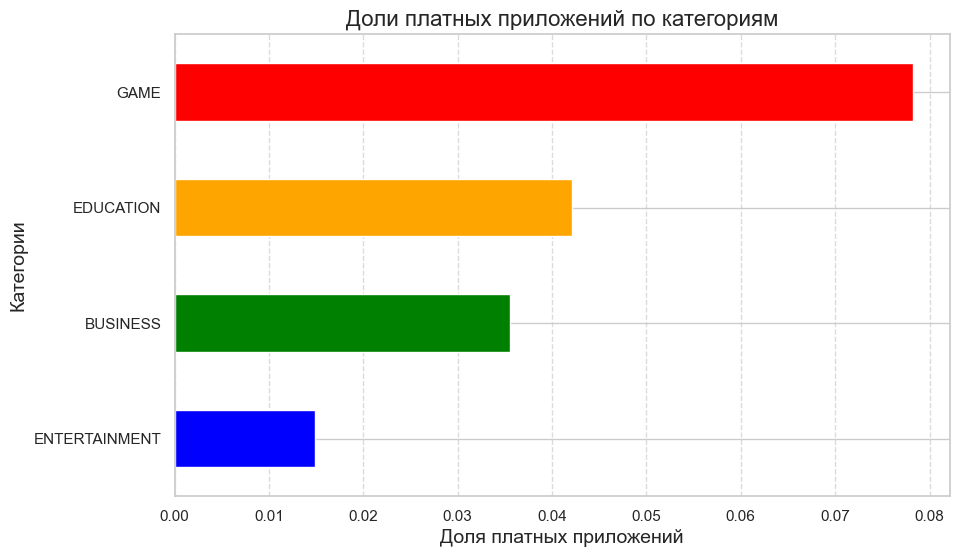

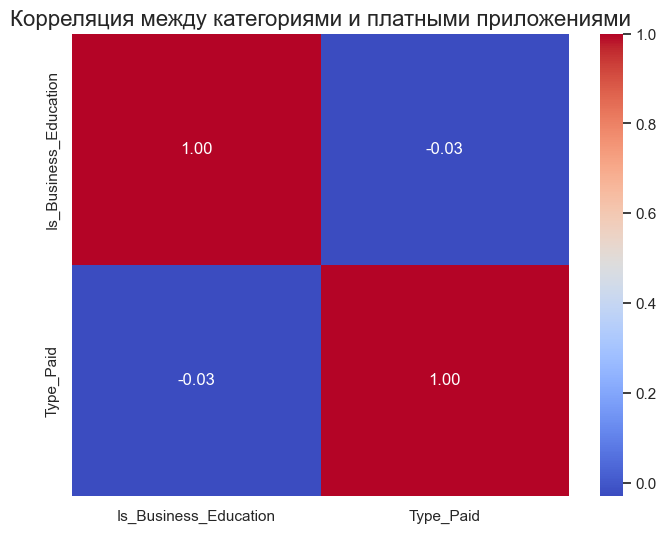

In [30]:
import matplotlib.pyplot as plt

# Визуализация долей платных приложений
plt.figure(figsize=(10, 6))
category_analysis['Paid Ratio'].sort_values().plot(kind='barh', color=['blue', 'green', 'orange', 'red'])
plt.title('Доли платных приложений по категориям', fontsize=16)
plt.xlabel('Доля платных приложений', fontsize=14)
plt.ylabel('Категории', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



# Выбор только числовых столбцов для корреляционной матрицы
correlation_matrix = columns_to_analyze[['Is_Business_Education']].copy()
correlation_matrix['Type_Paid'] = (columns_to_analyze['Type'] == 'Paid').astype(int)

# Расчёт корреляции
correlation_matrix = correlation_matrix.corr()

# Визуализация тепловой карты
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляция между категориями и платными приложениями', fontsize=16)
plt.show()




Переходим к заключительной гипотезе

In [31]:
# Фильтрация данных по необходимым столбцам
columns_to_analyze_filtered = columns_to_analyze[['Content Rating', 'Installs_more']].dropna()

# Вывод уникальных значений Content Rating
unique_content_ratings = columns_to_analyze_filtered['Content Rating'].unique()
print(f"Уникальные значения Content Rating: {unique_content_ratings}")


Уникальные значения Content Rating: ['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


In [32]:
# Фильтрация данных по категориям
everyone_apps = columns_to_analyze_filtered[columns_to_analyze_filtered['Content Rating'] == 'Everyone']
teen_apps = columns_to_analyze_filtered[columns_to_analyze_filtered['Content Rating'] == 'Teen']
mature_apps = columns_to_analyze_filtered[columns_to_analyze_filtered['Content Rating'] == 'Mature 17+']

# Количество записей
print(f"Количество приложений 'Everyone': {len(everyone_apps)}")
print(f"Количество приложений 'Teen': {len(teen_apps)}")
print(f"Количество приложений 'Mature 17+': {len(mature_apps)}")


Количество приложений 'Everyone': 5950
Количество приложений 'Teen': 832
Количество приложений 'Mature 17+': 332


In [33]:
# Функция для расчета статистики
def descriptive_statistics(data, category_name):
    stats = {
        'Среднее значение': data['Installs_more'].mean(),
        'Медиана': data['Installs_more'].median(),
        'Стандартное отклонение': data['Installs_more'].std(),
        'Максимум': data['Installs_more'].max(),
        'Минимум': data['Installs_more'].min(),
    }
    print(f"Описательная статистика для {category_name}:")
    for k, v in stats.items():
        print(f"{k}: {v}")
    print("-" * 50)

# Статистика для каждой группы
descriptive_statistics(everyone_apps, 'Everyone')
descriptive_statistics(teen_apps, 'Teen')
descriptive_statistics(mature_apps, 'Mature 17+')


Описательная статистика для Everyone:
Среднее значение: 6312421.473613446
Медиана: 100000.0
Стандартное отклонение: 34076893.53918336
Максимум: 500000000
Минимум: 1
--------------------------------------------------
Описательная статистика для Teen:
Среднее значение: 12575211.670673076
Медиана: 1000000.0
Стандартное отклонение: 67068735.04663063
Максимум: 1000000000
Минимум: 10
--------------------------------------------------
Описательная статистика для Mature 17+:
Среднее значение: 3597983.825301205
Медиана: 500000.0
Стандартное отклонение: 12331091.299362468
Максимум: 100000000
Минимум: 10
--------------------------------------------------


C:\Users\Иван\AppData\Local\Temp\ipykernel_24444\1531727533.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


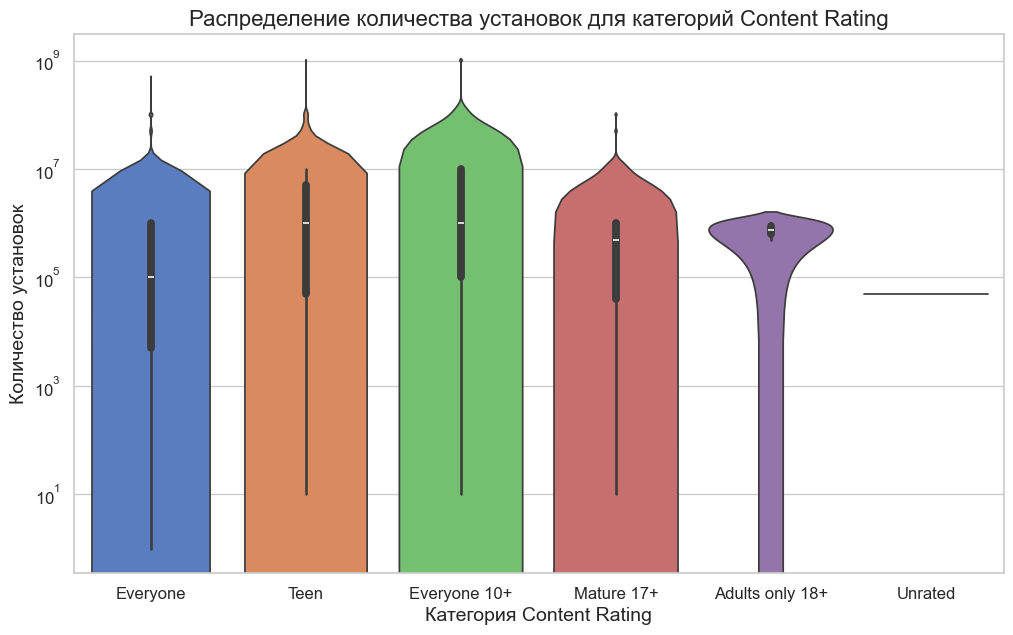

In [34]:
# Устанавливаем стиль
sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))

# Создаем виолин-плот
sns.violinplot(
    x='Content Rating',
    y='Installs_more',
    data=columns_to_analyze_filtered,
    palette='muted'
)

# Настройки для улучшения читаемости
plt.title('Распределение количества установок для категорий Content Rating', fontsize=16)
plt.xlabel('Категория Content Rating', fontsize=14)
plt.ylabel('Количество установок', fontsize=14)
plt.yscale('log')  # Логарифмическая шкала для наглядности
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Показать график
plt.show()


Гипотеза опровергнута. Everyone-приложения не имеют больше скачиваний, чем другие.